In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [15]:
df = pd.read_csv("test.csv")

In [16]:
df.head()

,Company,Company Ticker,Sector,Market Cap,Avg.TSR,avg.ROA,avg.ROE,avg.EPS,ma_per_year,div _per_year,Acq_per_year,Div as % deal value,Deal intensity
0,Alterra Limited,ASX:1AG,Industrials,4.73880,-0.134964,0.002032,-0.022584,-0.000132,0.0,0.0,0.0,0.000000,0.739903
1,Oneall International Limited,ASX:1AL,Consumer Discretionary,118.03500,-0.042105,0.000000,0.000000,0.000274,0.5,0.0,0.1,0.000000,0.033018
2,3P Learning Limited,ASX:3PL,Consumer Discretionary,207.45891,-0.303004,0.210716,0.394262,0.000585,1.0,0.0,0.3,0.000000,0.009096
3,4DS Memory Limited,ASX:4DS,Information Technology,84.18993,0.898538,-8.357925,-53.819294,-0.032576,0.5,0.1,0.1,0.032258,0.059452
4,88 Energy Limited,ASX:88E,Energy,135.23014,0.530739,-0.423939,-0.775745,-0.000427,0.2,0.0,0.2,0.000000,0.010364


In [43]:
df.columns

Index(['Company', 'Company Ticker', 'Sector', 'Market Cap', 'Avg.TSR',
       'avg.ROA', 'avg.ROE', 'avg.EPS', 'ma_per_year', 'div _per_year',
       'Acq_per_year', 'Div as % deal value', 'Deal intensity'],
      dtype='object')

In [50]:
X = df[['Market Cap', 'avg.ROA', 'avg.ROE', 'avg.EPS', 'ma_per_year', 'div _per_year','Acq_per_year', 'Div as % deal value', 'Deal intensity']].values

In [51]:
y = df['Avg.TSR'].values

In [66]:
print(X[0])

[  4.73880000e+00   2.03180000e-03  -2.25843000e-02  -1.32360000e-04
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   7.39902507e-01]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [54]:
print(X_train, y_train)

[[  1.09003208e+03   2.88580000e-02   5.18927000e-02 ...,   0.00000000e+00
    0.00000000e+00   2.99773827e-04]
 [  4.16598480e+02   1.36142333e-01   2.94033667e-01 ...,   0.00000000e+00
    0.00000000e+00   5.80622405e-02]
 [  2.85862540e+02   5.24242857e-03  -3.92671429e-03 ...,   3.00000000e-01
    0.00000000e+00   9.27214069e-02]
 ..., 
 [  4.76445000e+01   1.40355000e-02   1.78198000e-02 ...,   1.00000000e-01
    0.00000000e+00   4.51958371e-01]
 [  9.68893326e+03   2.31156200e-01   3.42607600e-01 ...,   5.00000000e-01
    0.00000000e+00   1.94034752e-03]
 [  8.81794530e+02   6.26889000e-02   1.47477500e-01 ...,   0.00000000e+00
    0.00000000e+00   2.98510740e-02]] [  3.54343967e-02   2.04159465e-01  -4.26775070e-02  -1.45594828e-01
   8.73609908e-02  -3.30243379e-01   6.48887892e-02   3.92002673e-01
   4.45885460e-01  -6.45566917e-01   1.54883619e-01  -4.68209865e-02
  -3.03452795e-01   1.69353808e-01  -6.58676000e-02   2.51020710e-01
   3.21966264e-01   6.93124202e-02  -1.04280

In [67]:
alphas = np.logspace(-4, 0, 20)
scores = np.empty_like(alphas)

In [68]:
print(alphas, scores)

[  1.00000000e-04   1.62377674e-04   2.63665090e-04   4.28133240e-04
   6.95192796e-04   1.12883789e-03   1.83298071e-03   2.97635144e-03
   4.83293024e-03   7.84759970e-03   1.27427499e-02   2.06913808e-02
   3.35981829e-02   5.45559478e-02   8.85866790e-02   1.43844989e-01
   2.33572147e-01   3.79269019e-01   6.15848211e-01   1.00000000e+00] [-4.         -3.78947368 -3.57894737 -3.36842105 -3.15789474 -2.94736842
 -2.73684211 -2.52631579 -2.31578947 -2.10526316 -1.89473684 -1.68421053
 -1.47368421 -1.26315789 -1.05263158 -0.84210526 -0.63157895 -0.42105263
 -0.21052632  0.        ]


In [69]:
for i, a in enumerate(alphas):
    lasso = linear_model.Lasso()
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    scores[i] = lasso.score(X_test, y_test)
    print(a, lasso.coef_)

0.0001 [ -6.60435294e-08  -6.47014075e-02  -1.54481362e-03   1.98120290e-02
   2.16374109e-02  -4.28267766e-01   3.30684189e-02   1.06747169e-01
  -3.88548420e-04]
0.000162377673919 [ -6.66916431e-08  -6.43110553e-02  -1.55326666e-03   1.57557394e-02
   2.18898875e-02  -4.13902686e-01   3.20157143e-02   1.03962751e-01
  -3.88661599e-04]
0.000263665089873 [ -6.77440122e-08  -6.36772107e-02  -1.56699251e-03   9.16922987e-03
   2.22998491e-02  -3.90577043e-01   3.03063626e-02   9.94414814e-02
  -3.88845376e-04]
0.000428133239872 [ -6.97504948e-08  -6.26590835e-02  -1.58929143e-03   0.00000000e+00
   2.29673563e-02  -3.52663279e-01   2.75312554e-02   9.20964143e-02
  -3.89137738e-04]
0.000695192796178 [ -7.59132577e-08  -6.11141369e-02  -1.62560931e-03   0.00000000e+00
   2.40690094e-02  -2.90727750e-01   2.30299611e-02   8.01351657e-02
  -3.89553419e-04]
0.00112883789168 [ -8.59202340e-08  -5.86054882e-02  -1.68458144e-03   0.00000000e+00
   2.58578525e-02  -1.90158234e-01   1.57208577e-0

In [70]:
lassocv = linear_model.LassoCV()
lassocv.fit(X, y)
lassocv_score = lassocv.score(X, y)
lassocv_alpha = lassocv.alpha_
print('CV', lassocv.coef_, lassocv_score, lassocv_alpha)

CV [ -1.16560634e-07  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00   0.00000000e+00
  -4.03694111e-04] 0.00455387661787 0.148606057208


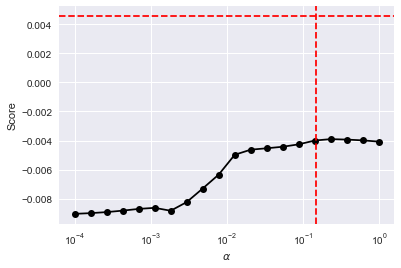

In [71]:
plt.plot(alphas, scores, '-ko')
plt.axhline(lassocv_score, color='r', ls='--')
plt.axvline(lassocv_alpha, color='r', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
#sns.despine(offset=15)